# Geohash + CID


Geohash functionality in Python [pygeohash](https://github.com/wdm0006/pygeohash)


In [ ]:
!pip install pygeohash

## Basic usage of pygeohash

In [1]:
import pygeohash as pgh

Can only import/use native python functions.


In [2]:
pgh.encode(latitude=42.6, longitude=-5.6)
# >>> 'ezs42e44yx96'

'ezs42e44yx96'

In [3]:
pgh.encode(latitude=42.6, longitude=-5.6, precision=5)
# >>> 'ezs42'

'ezs42'

In [4]:
pgh.decode(geohash='ezs42')
# >>> ('42.6', '-5.6')

(42.6, -5.6)

In [5]:
pgh.geohash_haversine_distance(geohash_1='bcd3u', geohash_2='bc83n')

179939.84348353872

In [6]:
pgh.eastern(geohash='kd3ybyu', direction='right')
# >>> kd3ybyv

TypeError: eastern() got an unexpected keyword argument 'geohash'

## Pipeline following Hojati's DSTree

In [7]:
##load geojson
import geopandas as gpd
import pandas as pd
import os

In [8]:
demo_points = gpd.read_file("../../data/maryland_demo/collegepark_restaurant.geojson")

<Axes: >

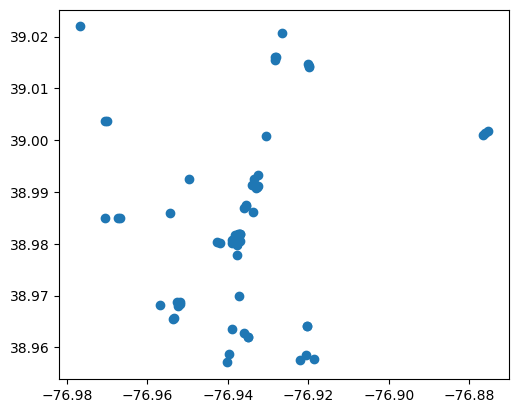

In [9]:
demo_points.plot()

In [10]:
demo_points = pd.concat([demo_points,demo_points.get_coordinates()],axis=1)

In [11]:
demo_points

,full_id,osm_id,osm_type,amenity,shop,reservation,contact:instagram,addr:country,contact:twitter,contact:facebook,...,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,location,entrance,geometry,x,y
0,n761374175,761374175,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,New Hampshire Avenue,MD,20903,10163,Silver Spring,NaN,NaN,POINT (-76.97675 39.02197),-76.976747,39.021969
1,n1089089766,1089089766,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.92647 39.02080),-76.926474,39.020802
2,n1330068715,1330068715,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.93486 38.96200),-76.934859,38.961997
3,n2162615415,2162615415,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.92214 38.95749),-76.922135,38.957493
4,n2295388385,2295388385,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Centerway,MD,20770,107,Greenbelt,NaN,NaN,POINT (-76.87658 39.00101),-76.876576,39.001010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,n8593453809,8593453809,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.95676 38.96810),-76.956760,38.968101
65,n8955296216,8955296216,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4746,NaN,NaN,NaN,POINT (-76.92821 39.01550),-76.928209,39.015495
66,n8964312874,8964312874,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9113,NaN,NaN,NaN,POINT (-76.97061 39.00373),-76.970610,39.003727
67,n8964312876,8964312876,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.97006 39.00378),-76.970056,39.003777


In [12]:
# calculate geohash for each point feature as well as CID
import pygeohash as pgh
demo_points['geohash'] = demo_points.apply(lambda row: pgh.encode(row['y'], row['x'],precision=6), axis=1)

In [13]:
demo_points

,full_id,osm_id,osm_type,amenity,shop,reservation,contact:instagram,addr:country,contact:twitter,contact:facebook,...,addr:state,addr:postcode,addr:housenumber,addr:city,location,entrance,geometry,x,y,geohash
0,n761374175,761374175,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,MD,20903,10163,Silver Spring,NaN,NaN,POINT (-76.97675 39.02197),-76.976747,39.021969,dqcmbr
1,n1089089766,1089089766,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.92647 39.02080),-76.926474,39.020802,dqcmcr
2,n1330068715,1330068715,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.93486 38.96200),-76.934859,38.961997,dqcm9k
3,n2162615415,2162615415,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.92214 38.95749),-76.922135,38.957493,dqcm9e
4,n2295388385,2295388385,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,MD,20770,107,Greenbelt,NaN,NaN,POINT (-76.87658 39.00101),-76.876576,39.001010,dqcmfe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,n8593453809,8593453809,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.95676 38.96810),-76.956760,38.968101,dqcm8v
65,n8955296216,8955296216,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4746,NaN,NaN,NaN,POINT (-76.92821 39.01550),-76.928209,39.015495,dqcmcq
66,n8964312874,8964312874,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9113,NaN,NaN,NaN,POINT (-76.97061 39.00373),-76.970610,39.003727,dqcmbk
67,n8964312876,8964312876,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.97006 39.00378),-76.970056,39.003777,dqcmbs


In [14]:
# Directory where the individual GeoJSON files will be saved
directory = r"../data/geohash_hojati"
# Make sure the directory exists, if not create it
if not os.path.exists(directory):
    os.makedirs(directory)

In [15]:
# Initialize an empty list to store file paths
file_paths = []
# Loop through each row in GeoDataFrame
for index, row in demo_points.iterrows():
    # Slice the GeoDataFrame to get a single feature (row)
    single_feature_gdf = demo_points.iloc[[index]]

    # Get 'osm_id' for the single feature
    osm_id = row['osm_id']

    # Define the full file path
    file_path = os.path.join(directory, f"{osm_id}.geojson")

    # Save single feature GeoDataFrame as GeoJSON
    single_feature_gdf.to_file(file_path, driver="GeoJSON")

    # Append file_path to list
    file_paths.append(file_path)

# Create a new column in the original GeoDataFrame to store file paths
demo_points['single_path'] = file_paths

In [16]:
demo_points

,full_id,osm_id,osm_type,amenity,shop,reservation,contact:instagram,addr:country,contact:twitter,contact:facebook,...,addr:postcode,addr:housenumber,addr:city,location,entrance,geometry,x,y,geohash,single_path
0,n761374175,761374175,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,20903,10163,Silver Spring,NaN,NaN,POINT (-76.97675 39.02197),-76.976747,39.021969,dqcmbr,../data/geohash_hojati/761374175.geojson
1,n1089089766,1089089766,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-76.92647 39.02080),-76.926474,39.020802,dqcmcr,../data/geohash_hojati/1089089766.geojson
2,n1330068715,1330068715,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-76.93486 38.96200),-76.934859,38.961997,dqcm9k,../data/geohash_hojati/1330068715.geojson
3,n2162615415,2162615415,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-76.92214 38.95749),-76.922135,38.957493,dqcm9e,../data/geohash_hojati/2162615415.geojson
4,n2295388385,2295388385,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,20770,107,Greenbelt,NaN,NaN,POINT (-76.87658 39.00101),-76.876576,39.001010,dqcmfe,../data/geohash_hojati/2295388385.geojson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,n8593453809,8593453809,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-76.95676 38.96810),-76.956760,38.968101,dqcm8v,../data/geohash_hojati/8593453809.geojson
65,n8955296216,8955296216,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4746,NaN,NaN,NaN,POINT (-76.92821 39.01550),-76.928209,39.015495,dqcmcq,../data/geohash_hojati/8955296216.geojson
66,n8964312874,8964312874,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9113,NaN,NaN,NaN,POINT (-76.97061 39.00373),-76.970610,39.003727,dqcmbk,../data/geohash_hojati/8964312874.geojson
67,n8964312876,8964312876,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (-76.97006 39.00378),-76.970056,39.003777,dqcmbs,../data/geohash_hojati/8964312876.geojson


In [17]:

def compute_cid(file_path):
    import subprocess
    cid = subprocess.check_output(["ipfs", "add", "-qn", file_path]).decode().strip()
    return cid

In [18]:
demo_points['single_cid'] = demo_points.apply(lambda x: compute_cid(x['single_path']),axis=1)

In [19]:
demo_points.to_file("../../data/maryland_demo/collegepark_restaurant_cid.geojson")

In [38]:
#arrange cid by geohash
pairs = list(zip(demo_points['geohash'],demo_points['single_cid']))

In [40]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.value = []


class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, index, value):
        node = self.root
        for char in str(index):
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.value.append(value)

    def get(self, index):
        node = self.root
        for char in str(index):
            if char not in node.children:
                return None
            node = node.children[char]
        return node.value

In [41]:
# Create an empty Trie dictionary
trie_dict = Trie()

# Insert each index-value pair into the Trie dictionary
for index, value in pairs:
    trie_dict.insert(index, value)

In [59]:
def export_trie(trie_node,geohash,root_path):
    #export geojson at current hash level
    next_path = root_path+"/"+"".join(geohash)
    leaf_path = root_path+f"/{geohash}.txt"
    print(geohash,root_path,next_path,leaf_path)
    if trie_node.value:
        # Open a file in write mode
        with open(leaf_path, 'w') as f:
            for item in trie_node.value:
                f.write(f"{item}\n")
    #make path and export to sub folder
    import os 
    if trie_node.children and not os.path.exists(next_path):
        os.makedirs(next_path)
    for ch in trie_node.children:
        child_hash = geohash+ch
        export_trie(trie_node.children[ch],child_hash,next_path)

In [ ]:
export_trie(trie_dict.root,"",r"../data/geohash_hojati/index")